In [1]:
import random
test_list = random.sample(range(0, 500), 100)
test_list.sort()

In [2]:
import csv

train_matrix = []
test_matrix = []
train_label = []
test_label = []

with open('dataset/Admission_Predict_data/Admission_Predict_Ver1.1.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader) # title
    index_test_list = 0
    index_row_list = 0
    for row in reader:
        train_row = []
        for i in range(1, len(row) - 1):
            train_row.append(float(row[i]))
        test_row = float(row[-1])
        
        if index_test_list < 100 and test_list[index_test_list] == index_row_list:
            test_matrix.append(train_row)
            test_label.append(test_row)
            index_test_list += 1
        else:
            train_matrix.append(train_row)
            train_label.append(test_row)
        index_row_list += 1
        

In [3]:
print(len(train_matrix))
print(len(test_matrix))

400
100


## Linear Regression Model


In [4]:
import numpy as np
x = np.array(train_matrix)
y = np.array(train_label)

In [5]:
from sklearn import datasets, linear_model
# define model
regression_model = linear_model.LinearRegression()
regression_model.fit(x, y)
# training
x_test = np.array(test_matrix)
y_test = regression_model.predict(x_test)
# testing
regression_model.score(x_test, np.array(test_label))

0.8126990784674079

In [6]:
# coefficient
coefficient = regression_model.coef_
interception = regression_model.intercept_

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_test)), y_test, 'b', label = "predict")
plt.plot(range(len(test_label)), test_label, 'r', label = "ground truth")
plt.show()

<Figure size 640x480 with 1 Axes>

## Subset Selection

In [8]:
import subset_select_file
set_size = subset_select_file.subset_select(x)

In [9]:
for i in range(1, 8):
    print(len(set_size[i]))

7
21
35
35
21
7
1


### cross_val

In [10]:
from sklearn.model_selection import KFold

def cross_val(data, label, lamda = None):
    kfold = KFold(n_splits = 5, shuffle = True)
    index = kfold.split(X = data)
    index = kfold.split(X = data, y = label)
    cross_val_error = []
    for train_index, test_index in index:
        regression_model.fit(data[train_index], label[train_index])
        y_pred = regression_model.predict(data[test_index])
        error = 0
        for i in range(len(y_pred)):
            error += (y_pred[i] - label[test_index][i])**2
        cross_val_error.append(error)
    exp_error = sum(cross_val_error)/len(cross_val_error)
    return exp_error


In [11]:
output_error = {}
min_error = []
for i in range(1, 8):
    temp_error = []
    for data in set_size[i]:
        
        temp_error.append(cross_val(data, y))
    output_error[i] = temp_error
    min_error.append(min(temp_error))

print_x = []
print_y = []
for i in range(1, 8):
    for j in output_error[i]:
        print_x.append(i)
        print_y.append(j)

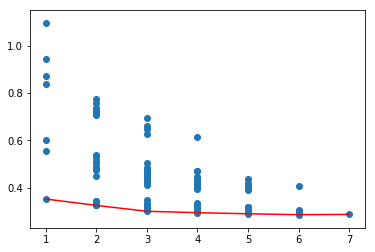

In [12]:
plt.scatter(print_x , print_y)
plt.plot(range(1, 8), min_error, "r")
plt.show()

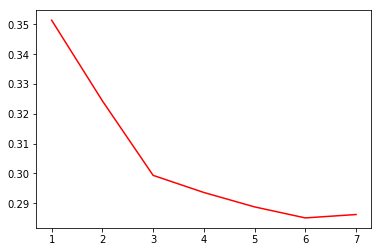

In [13]:
plt.plot(range(1, 8), min_error, "r")
plt.show()